In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/birdclef-2024/sample_submission.csv
/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv
/kaggle/input/birdclef-2024/train_metadata.csv
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1872382287.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/161691311.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/884633066.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1675425185.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1469579221.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1564606141.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/194233408.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2003586554.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1459749597.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/33854460.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1163678028.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1682474551.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/825970922.ogg
/kaggle/inp

In [5]:
#Loading in the metadata and only including the relative columns
metadata = pd.read_csv('/kaggle/input/birdclef-2024/train_metadata.csv')
#Choosing the important columns
metadata_relevant_columns = metadata[['primary_label', 'latitude', 'longitude', 'author', 'filename']]
#Showing first 10 rows
metadata_relevant_columns.head(10)

,primary_label,latitude,longitude,author,filename
0,asbfly,39.2297,118.1987,Matt Slaymaker,asbfly/XC134896.ogg
1,asbfly,51.4030,104.6401,Magnus Hellström,asbfly/XC164848.ogg
2,asbfly,36.3319,127.3555,Stuart Fisher,asbfly/XC175797.ogg
3,asbfly,21.1697,70.6005,vir joshi,asbfly/XC207738.ogg
4,asbfly,15.5442,73.7733,Albert Lastukhin & Sergei Karpeev,asbfly/XC209218.ogg
5,asbfly,15.5442,73.7733,Albert Lastukhin & Sergei Karpeev,asbfly/XC209219.ogg
6,asbfly,42.5275,130.6920,Albert Lastukhin,asbfly/XC267679.ogg
7,asbfly,44.3602,132.7989,Albert Lastukhin,asbfly/XC267680.ogg
8,asbfly,44.3602,132.7989,Albert Lastukhin,asbfly/XC267681.ogg
9,asbfly,42.5275,130.6920,Albert Lastukhin,asbfly/XC267682.ogg


In [6]:
#Loading the bird taxonomy
taxonomy = pd.read_csv('/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv')
#Showing first 10 rows
taxonomy.head(10)

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN
5,15,issf,lesrhe4,Lesser Rhea (Puna),Rhea pennata tarapacensis/garleppi,Rheiformes,Rheidae (Rheas),NaN,lesrhe2
6,18,issf,lesrhe3,Lesser Rhea (Darwin's),Rhea pennata pennata,Rheiformes,Rheidae (Rheas),NaN,lesrhe2
7,19,species,tabtin1,Tawny-breasted Tinamou,Nothocercus julius,Tinamiformes,Tinamidae (Tinamous),Tinamous,NaN
8,20,species,higtin1,Highland Tinamou,Nothocercus bonapartei,Tinamiformes,Tinamidae (Tinamous),NaN,NaN
9,21,issf,higtin2,Highland Tinamou (South American),Nothocercus bonapartei [bonapartei Group],Tinamiformes,Tinamidae (Tinamous),NaN,higtin1


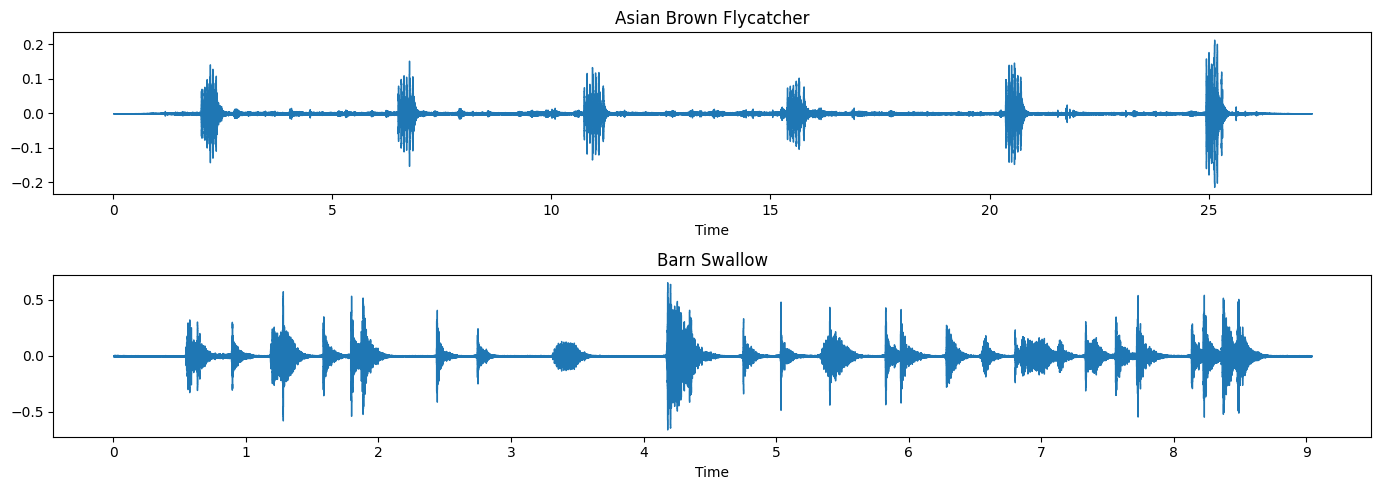

In [7]:
import matplotlib
import librosa
import matplotlib.pyplot as plt

#Loading the first two audio files
audio1_data, audio1_rate = librosa.load('/kaggle/input/birdclef-2024/train_audio/'+metadata.filename[0])
audio2_data, audio2_rate = librosa.load('/kaggle/input/birdclef-2024/train_audio/'+metadata.filename[100])

#Showing the two audio files
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio1_data, sr=audio1_rate)
plt.title(metadata.common_name[0])

plt.subplot(2, 1, 2)
librosa.display.waveshow(audio2_data, sr=audio2_rate)
plt.title(metadata.common_name[1000])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Barn Swallow')

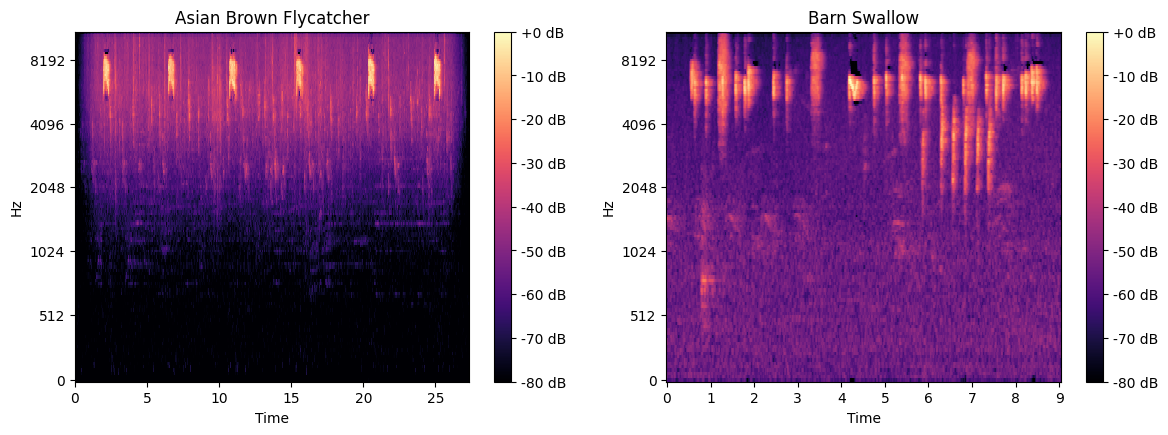

In [8]:
import numpy as np

#Displaying the spectrograms for both audio files

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
S1 = librosa.feature.melspectrogram(y=audio1_data, sr=audio1_rate, n_mels=128)
S1_dB = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(S1_dB, sr=audio1_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(metadata.common_name[1])

plt.subplot(2, 2, 2)
S2 = librosa.feature.melspectrogram(y=audio2_data, sr=audio2_rate, n_mels=128)
S2_dB = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(S2_dB, sr=audio2_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(metadata.common_name[1000])

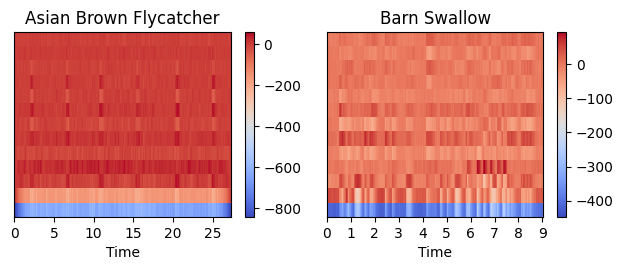

In [9]:

plt.subplot(2, 2, 3)
mfcc1 = librosa.feature.mfcc(y=audio1_data, sr=audio1_rate, n_mfcc=13)
librosa.display.specshow(mfcc1, x_axis='time')
plt.colorbar()
plt.title(metadata.common_name[1])

plt.subplot(2, 2, 4)
mfcc2 = librosa.feature.mfcc(y=audio2_data, sr=audio2_rate, n_mfcc=13)
librosa.display.specshow(mfcc2, x_axis='time')
plt.colorbar()
plt.title(metadata.common_name[1000])

plt.tight_layout()
plt.show()

In [10]:
train_data = []

for index, row in metadata.iterrows():
    # Load audio data
    audio_path = '/kaggle/input/birdclef-2024/train_audio/' + row['filename']
    audio_data, sr = librosa.load(audio_path)
    print("vegigment")

    #Extracting spektrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
   
    #Extracting MFCC
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
   
    #Finding the corresponding taxonomy entry based on the common name
    species_info = taxonomy[taxonomy['PRIMARY_COM_NAME'] == row['common_name']]

    if not species_info.empty:
        species_info = species_info.iloc[0]
        train_data.append({
            'primary_label': row['primary_label'],
            'latitude': row['latitude'],
            'longitude': row['longitude'],
            'author': row['author'],
            'filename': row['filename'],
            'mfccs': mfccs,
            'mel_spectrogram': mel_spectrogram_db,
            'common_name': row['common_name'],
            'species_code': species_info['SPECIES_CODE'],
            'scientific_name': species_info['SCI_NAME'],
            'family': species_info['FAMILY'],
            'order': species_info['ORDER1'],
        })

# A train_data DataFrame
train_df = pd.DataFrame(train_data)

# Ellenőrizhetjük a kész DataFrame-t
print(train_df.head())

vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment
vegigment


KeyboardInterrupt: 